In [1]:
import pystan

In [2]:
schools_code = """
data {
    int<lower=0> J; // number of schools
    vector[J] y; // estimated treatment effects
    vector<lower=0>[J] sigma; // s.e. of effect estimates
}
parameters {
    real mu;
    real<lower=0> tau;
    vector[J] eta;
}
transformed parameters {
    vector[J] theta;
    theta = mu + tau * eta;
}
model {
    eta ~ normal(0, 1);
    y ~ normal(theta, sigma);
}
"""

schools_dat = {'J': 8,
               'y': [28,  8, -3,  7, -1,  1, 18, 12],
               'sigma': [15, 10, 16, 11,  9, 11, 10, 18]}

In [3]:
%%time
sm = pystan.StanModel(model_code=schools_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_19a09b474d1901f191444eaf8a6b8ce2 NOW.


CPU times: user 1.09 s, sys: 73.1 ms, total: 1.16 s
Wall time: 1min 5s


In [4]:
%%time
fit = sm.sampling(data=schools_dat, iter=1000, chains=4)

CPU times: user 52.8 ms, sys: 21.1 ms, total: 73.9 ms
Wall time: 163 ms


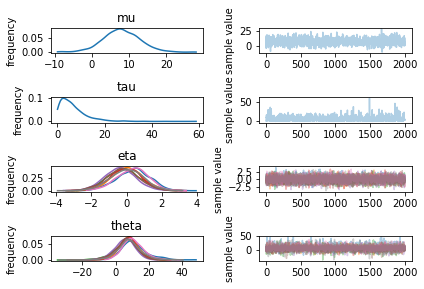

In [5]:
fig = fit.plot()
fig.tight_layout()